# Python packages to install

In [1]:
# pip install tensorflow
# pip install matplotlib
# pip install numpy
# pip install pandas

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
from datetime import datetime
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

# Map output values to Ascii characters

In [4]:
#Character Class mapping for CNN output indexing

#There should be 62 outputs corresponding to chars within: [0-9][a-z][A-Z]
#letters like o,u,p look the same uppercase or lowercase hence the reduction

char_mapping = {
0 : "0",
1 : "1",
2 : "2",
3 : "3",
4 : "4",
5 : "5",
6 : "6",
7 : "7",
8 : "8",
9 : "9",
10 : "A",
11 : "B",
12 : "C",
13 : "D",
14 : "E",
15 : "F",
16 : "G",
17 : "H",
18 : "I",
19 : "J",
20 : "K",
21 : "L",
22 : "M",
23 : "N",
24 : "O",
25 : "P",
26 : "Q",
27 : "R",
28 : "S",
29 : "T",
30 : "U",
31 : "V",
32 : "W",
33 : "X",
34 : "Y",
35 : "Z",
36 : "a",
37 : "b",
38 : "d",
39 : "e",
40 : "f",
41 : "g",
42 : "h",
43 : "n",
44 : "q",
45 : "r",
46 : "t"
}

# char_mapping = {
# 0 : "0",
# 1 : "1",
# 2 : "2",
# 3 : "3",
# 4 : "4",
# 5 : "5",
# 6 : "6",
# 7 : "7",
# 8 : "8",
# 9 : "9",
# 10 : "A",
# 11 : "B",
# 12 : "C",
# 13 : "D",
# 14 : "E",
# 15 : "F",
# 16 : "G",
# 17 : "H",
# 18 : "I",
# 19 : "J",
# 20 : "K",
# 21 : "L",
# 22 : "M",
# 23 : "N",
# 24 : "O",
# 25 : "P",
# 26 : "Q",
# 27 : "R",
# 28 : "S",
# 29 : "T",
# 30 : "U",
# 31 : "V",
# 32 : "W",
# 33 : "X",
# 34 : "Y",
# 35 : "Z",
# 36 : "a",
# 37 : "b",
# 38 : "c",
# 39 : "d",
# 40 : "e",
# 41 : "f",
# 42 : "g",
# 43 : "h",
# 44 : "i",
# 45 : "j",
# 46 : "k",
# 47 : "l",
# 48 : "m",
# 49 : "n",
# 50 : "o",
# 51 : "p",
# 52 : "q",
# 53 : "r",
# 54 : "s",
# 55 : "t",
# 56 : "u",
# 57 : "v",
# 58 : "w",
# 59 : "x",
# 60 : "y",
# 61 : "z"
# }

# Load eMNIST Dataset in

In [5]:
#Loading eMNIST Data Set
emnist_train_data_path = './data/emnist-balanced-train.csv'
emnist_test_data_path = './data/emnist-balanced-test.csv'

#Read csv to pandas dataframe
train_data_df = pd.read_csv(emnist_train_data_path, header=None)
test_data_df = pd.read_csv(emnist_test_data_path, header=None)

train_data = np.array(train_data_df, dtype='float32')
test_data = np.array(test_data_df, dtype='float32')


print("done")

done


# What the Raw EMNIST Dataset looks like

In [6]:
#The first column is the image label, the first column to the 785 column 
#is the pixel data of the image itself

train_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare Training Data

In [7]:
#Separate the image data from the labels into xs and ys respectively
# and normalize the data from (0 to 255) to (0 to 1)
xs_train = normalize(train_data[:, 1:], axis=1)
ys_train = train_data[:, 0]

xs_test = normalize(test_data[:, 1:], axis=1)
ys_test = train_data[:, 0]

#split our training data into training and validation data
xs_train, xs_validate, ys_train, ys_validate = train_test_split(
    xs_train, ys_train, test_size=0.2, random_state=12345,
)


#convert Ys label data to categorical ascii characters
ys_train_labels = to_categorical( ys_train, num_classes=len(char_mapping) )
ys_validation_labels = to_categorical( ys_validate, num_classes=len(char_mapping) )
ys_test_labels = to_categorical( ys_test, num_classes=len(char_mapping) )

#RESHAPE DATA
#reshape xs to (28,28,1) 28px x 28px with an extra dimension for convolution filter layer output
img_shape = (28, 28, 1)

x_train = xs_train.reshape(-1,*img_shape)
x_validate = xs_validate.reshape(-1, *img_shape)
x_test =xs_test.reshape(-1 , *img_shape)


#transpose data
x_train = np.transpose( 
        x_train, 
        axes=[0, 2, 1, 3]
        )
x_validate = np.transpose(
        x_validate,
        axes=[0, 2, 1, 3]
        )
x_test = np.transpose(
        x_test,
        axes=[0, 2, 1, 3]
        )


print("Done Preparing Training Data")

Done Preparing Training Data


In [8]:
# Quick look at the training data shape
print("Training Dataframe: ", train_data_df.shape)
print("X_train: ", xs_train.shape)
print("X_validate: ", xs_validate.shape)

Training Dataframe:  (112800, 785)
X_train:  (90240, 784)
X_validate:  (22560, 784)


# How the cleaned training data looks

How the Cleaned data looks:
Classification:  0


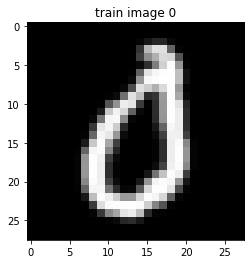

Classification:  L


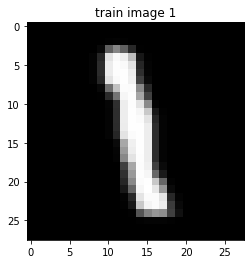

Classification:  J


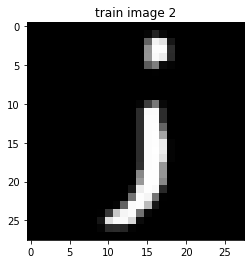

Classification:  L


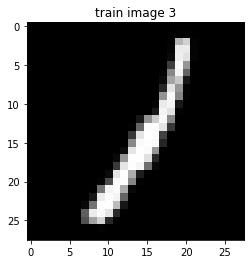

Classification:  q


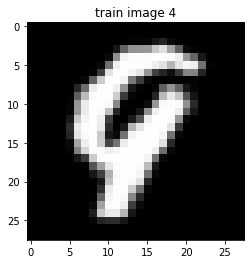

In [9]:
#transpose x img data because, the images are flipped 90 degrees
#see for yourself

print("How the Cleaned data looks:")
for trainDataIdx in range(0, 5):
    print( "Classification: ",char_mapping[ys_train[trainDataIdx]] )
    plt.title("train image {}".format(trainDataIdx))
    plt.imshow(x_train[trainDataIdx, :], cmap='Greys_r')
    plt.show()

# Creating the Neural Network Model

In [10]:
model_v7_6 = Sequential()
model_v7_6.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = x_train.shape[1:]))
model_v7_6.add(BatchNormalization())
model_v7_6.add(Conv2D(32, kernel_size = 3, activation='relu',kernel_regularizer=regularizers.l2(0.0001) ))
model_v7_6.add(BatchNormalization())
model_v7_6.add(Conv2D(32, kernel_size = 5,padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001) )) #kernel_regularizer=regularizers.l2(0.01)
model_v7_6.add(BatchNormalization())
model_v7_6.add(MaxPooling2D(pool_size=(2,2), strides=1 ))
model_v7_6.add(MaxPooling2D(pool_size=(2,2), strides=2 ))
model_v7_6.add(Dropout(0.4))

model_v7_6.add(Conv2D(64, kernel_size = 3, activation='relu' ))
model_v7_6.add(BatchNormalization())
model_v7_6.add(Conv2D(64, kernel_size = 3, activation='relu', kernel_regularizer=regularizers.l2(0.0001) ))
model_v7_6.add(BatchNormalization())
model_v7_6.add(Conv2D(64, kernel_size = 5, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001) )) #kernel_regularizer=regularizers.l2(0.01)
model_v7_6.add(BatchNormalization())
model_v7_6.add(Dropout(0.5)) #add back and at 0.4

model_v7_6.add(Conv2D(128, kernel_size = 4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_v7_6.add(BatchNormalization())
model_v7_6.add(Dropout(0.5))
model_v7_6.add(Flatten())
model_v7_6.add(Dense(units=256, activation='relu')) #changed to 256
model_v7_6.add(Dropout(0.2)) #reduce to 0.2 from 0.4
model_v7_6.add(Dense(units=len(char_mapping), activation='softmax'))

# Compile the Model 

In [11]:
#sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_v7_6.compile( loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"] )

# Model Summary

In [12]:
model_v7_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0

# Train the Model

In [16]:
# Setup log directory for TensorBoard
logdir = "logs/model_v7-6-4-2_" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
#Actually train the model
history = model_v7_6.fit( x_train, ys_train, epochs=14,batch_size=64, shuffle=True, validation_split=0.2, verbose=1, callbacks=[tensorboard_callback] )


Epoch 1/14
1128/1128 [==============================] - 149s 131ms/step - loss: 1.9168 - accuracy: 0.5159 - val_loss: 0.5573 - val_accuracy: 0.8170
Epoch 2/14
1128/1128 [==============================] - 143s 127ms/step - loss: 0.6234 - accuracy: 0.8000 - val_loss: 0.4768 - val_accuracy: 0.8485
Epoch 3/14
1128/1128 [==============================] - 144s 128ms/step - loss: 0.5269 - accuracy: 0.8326 - val_loss: 0.4581 - val_accuracy: 0.8562
Epoch 4/14
1128/1128 [==============================] - 144s 128ms/step - loss: 0.5043 - accuracy: 0.8410 - val_loss: 0.4499 - val_accuracy: 0.8568
Epoch 5/14
1128/1128 [==============================] - 146s 129ms/step - loss: 0.4826 - accuracy: 0.8495 - val_loss: 0.4443 - val_accuracy: 0.8587
Epoch 6/14
1128/1128 [==============================] - 147s 131ms/step - loss: 0.4700 - accuracy: 0.8545 - val_loss: 0.4499 - val_accuracy: 0.8664
Epoch 7/14
1128/1128 [==============================] - 147s 130ms/step - loss: 0.4689 - accuracy: 0.8603 - val_

# Open TensorBoard to examine visualizations

In [15]:
#Open TensorBoard to examine loss
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 13292), started 0:01:10 ago. (Use '!kill 13292' to kill it.)

# Evaluating performance on the test dataset

In [18]:
test_loss, test_acc = model_v7_6.evaluate(x_validate, ys_validate)
print(f'Test loss: {test_loss} / Test accuracy: {test_acc}')

705/705 [==============================] - 11s 15ms/step - loss: 0.4089 - accuracy: 0.8830
Test loss: 0.4088931977748871 / Test accuracy: 0.8829787373542786


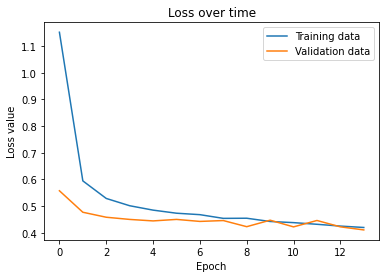

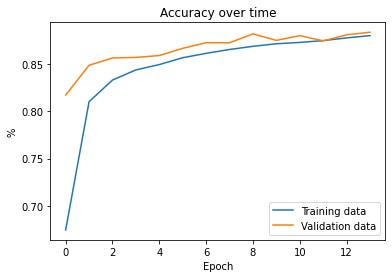

In [19]:
# Plot history of Loss to visualize the training process
plt.plot(history.history['loss'], label='Training data')
plt.plot(history.history['val_loss'], label='Validation data')
plt.title('Loss over time')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training data')
plt.plot(history.history['val_accuracy'], label='Validation data')
plt.title('Accuracy over time')
plt.ylabel('%')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Save Trained Model to h5 file

In [20]:
#Save Model to file for later use in Web application
h5modelOutputFilePath = 'emnist_keras_trained_model_v7.6.4.2.h5'
model_v7_6.save(h5modelOutputFilePath)
print('saved')

saved


# Test out models predictions yourself

[[6.2268269e-01 3.6763086e-07 6.5630928e-05 ... 1.1629659e-06
  4.2235681e-07 2.1573931e-05]
 [5.0522136e-05 3.1907729e-07 7.8176657e-07 ... 4.0707619e-06
  1.5240134e-04 8.4169875e-07]
 [2.2318288e-06 2.7644218e-08 2.0507724e-07 ... 2.2459291e-08
  3.8014446e-07 5.4091779e-06]
 ...
 [2.0889537e-09 5.5592393e-09 1.7915639e-06 ... 3.9836019e-09
  4.4858601e-09 4.1017048e-10]
 [4.4777952e-08 9.4787644e-09 2.5841132e-06 ... 2.5211255e-09
  8.9460761e-10 1.5580450e-09]
 [7.1565216e-09 3.4434288e-06 1.4686366e-07 ... 1.2090673e-08
  1.4939587e-08 1.8606809e-06]]


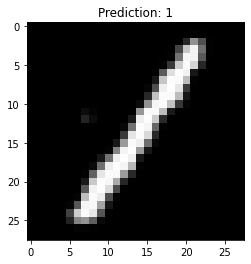

In [267]:
# Test a Random image from the test dataset
img_num_to_test = np.random.randint(0, high=len(x_test)-1)

predictions = model_v7_6.predict([x_test])
plt.title("Prediction: " + char_mapping[np.argmax(predictions[img_num_to_test])])
plt.imshow(x_test[img_num_to_test], cmap="Greys_r")
plt.show()